In [1]:
import numpy as np 
import sys 
import os
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import itertools
from mpl_toolkits.mplot3d import Axes3D
# import scienceplots 

# plt.style.use(['science'])



In [2]:
import yaml 
def read_yaml_input_file(fname: str) -> dict: 
    with open(fname, 'r') as f: 
        return yaml.safe_load(f)

available=[ "rho", "vx", "vy", "vz", "p", "temperature"]
units={
        "rho": "kg m^{-3}",
        "vx" : "m s^{-1}",
        "vy" : "m s^{-1}",
        "vz" : "m s^{-1}",
        "p" :  "kg m s^{-1}", 
        "temperature":"C"
        }

In [19]:
run_dirs = '/scratch/project_2005083/deep-green/scalings2/results/run4'
config_dir = '/scratch/project_2005083/deep-green/scalings2/run4'

In [20]:
configs = os.listdir(config_dir)
configs = [conf for conf in configs if '.ipynb_checkpoints' not in conf]

In [26]:
# Initialize a dictionary to hold all the results
results = {}

for config_name in configs:
    config = read_yaml_input_file(os.path.join(config_dir, config_name))
    # Construct the run directory path and load the data
    run_dir = os.path.join(run_dirs, config_name.split('.yaml')[0])
    if not os.path.exists(run_dir): 
        continue
    final_time_index = max(list(set([fname.split('.npy')[0].split('_')[-1] for fname in os.listdir(run_dir)])))
    final_time_index = 3
    rho, T, vx, vy, vz, p = [np.load(os.path.join(run_dir, f'{var}_{final_time_index}.npy')) for var in ['rho', 'T', 'vx', 'vy', 'vz', 'p']]

    # Calculate the required statistics and store in the dictionary
    results[config_name] = {
        'T_mean': np.mean(T),
        'T_std': np.std(T),
        'thickness': config['wall_thickness'],
        'comp_power': config['computer_power'],
        'outside_temp': config['outside_temperature']
    }


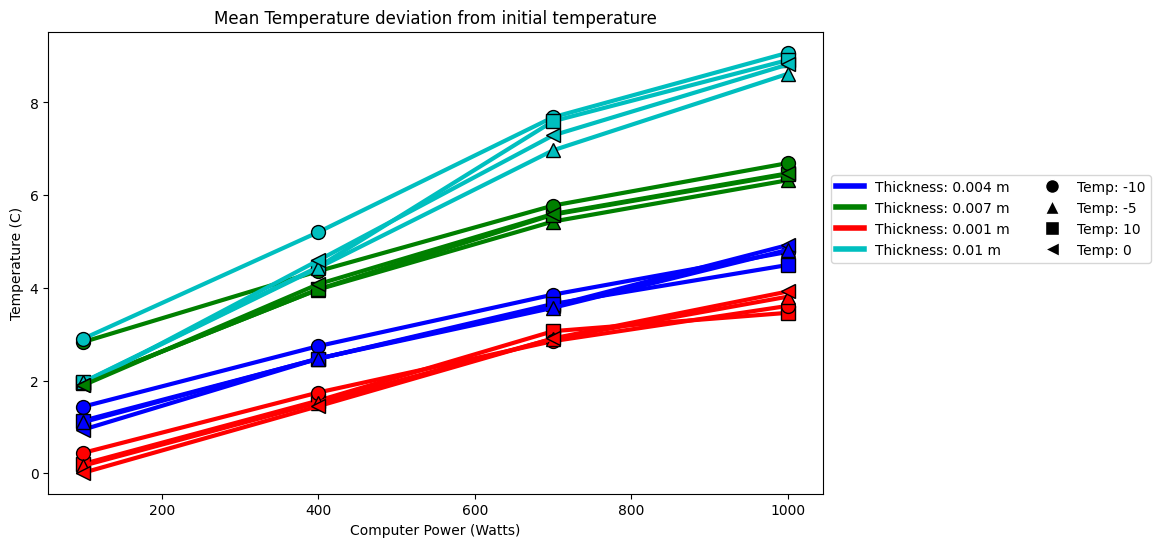

In [35]:
# Define marker styles and colors
markers = itertools.cycle(('o', '^', 'd', '>'))  # Example markers
colors = itertools.cycle(('b', 'g', 'r', 'c'))  # Example colors

# Group data by wall_thickness and outside_temperature
grouped_results = {}
for config_name, data in results.items():
    key = (data['thickness'], data['outside_temp'])
    if key not in grouped_results:
        grouped_results[key] = {'comp_power': [], 'T_mean': []}
    grouped_results[key]['comp_power'].append(data['comp_power'])
    grouped_results[key]['T_mean'].append(data['T_mean'])

# Plotting
plt.figure(figsize=(10, 6))

# Create a legend mapping for thickness and temperature
thickness_legend = {}
temperature_legend = {-10: 'o', -5: '^', 10: 's', 0: '<'}

for (thickness, temp), data in grouped_results.items():
    color = thickness_legend.get(thickness, next(colors))
    marker = temperature_legend.get(temp, next(markers))
    x, y = data['comp_power'], data['T_mean']
    x, y = np.array(x), np.array(y) - (temp + 2.0)
    sorted_idxs = np.argsort(x)
    plt.plot(x[sorted_idxs], y[sorted_idxs], label=f'Thickness: {thickness}, Temp: {temp}', marker=marker, color=color, lw=3, markersize=10, markeredgecolor=(0, 0, 0))
    thickness_legend[thickness] = color
    temperature_legend[temp] = marker

# Create custom legends
thickness_labels = [plt.Line2D([0], [0], color=color, lw=4, label=f'Thickness: {th / 10.0:.4} m') for th, color in thickness_legend.items()]
temperature_labels = [plt.Line2D([0], [0], marker=marker, color='w', label=f'Temp: {temp}', markerfacecolor='k', markersize=10) for temp, marker in temperature_legend.items()]
# for temperature in temperature_legend.keys(): 
#     plt.axhline(temperature + 2.0, alpha=0.1, color='grey', ls='--')
plt.xlabel('Computer Power (Watts)')
plt.ylabel('Temperature (C)')
plt.title('Mean Temperature deviation from initial temperature')
plt.legend(handles=thickness_labels + temperature_labels, ncols=2, loc=(1.01, 0.5))
plt.savefig('./scaling_res3.png')
plt.show()

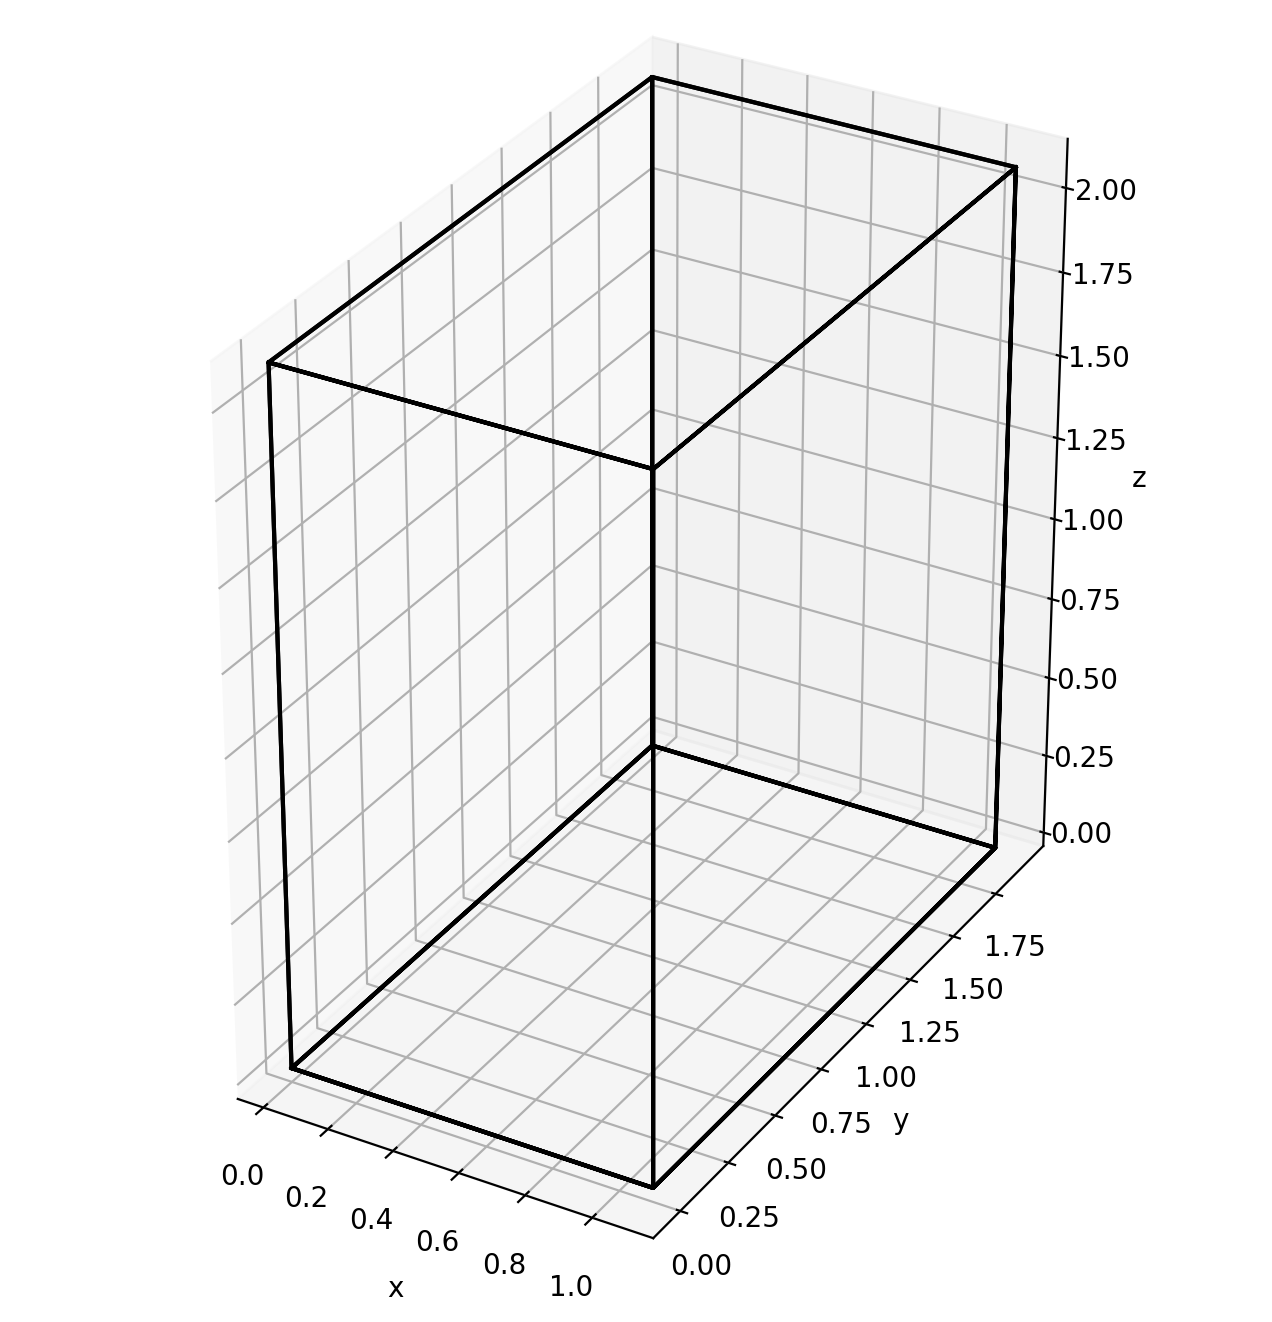

In [25]:
Nx, Ny, Nz = T.shape
ds = 0.05
fig = plt.figure(figsize=(8, 8), dpi=200)
ax = fig.add_subplot(111, projection='3d')
# outline of the 6 faces of box 
ax.plot([0, 0, 0, 0, 0, 0, 0, 0], [0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [0, 0, 0, 0, 0, 0, 0, 0], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds], color='k')

# plot the lines
# for y_idx, x_idx in zip([2, 4, 7, 8,9, 10], [2, 4, 7, 7, 7, 7]):
# ax.plot([ds*(Nx//x_idx), ds*(Nx//x_idx)], [ds*(Ny//y_idx), ds*(Ny//y_idx)], [0, Nz*ds])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# set aspect ratio to be the same 
# ax.set_aspect('equal')
limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
ax.set_box_aspect(np.ptp(limits, axis = 1))
plt.show()

0.0 3.5490112


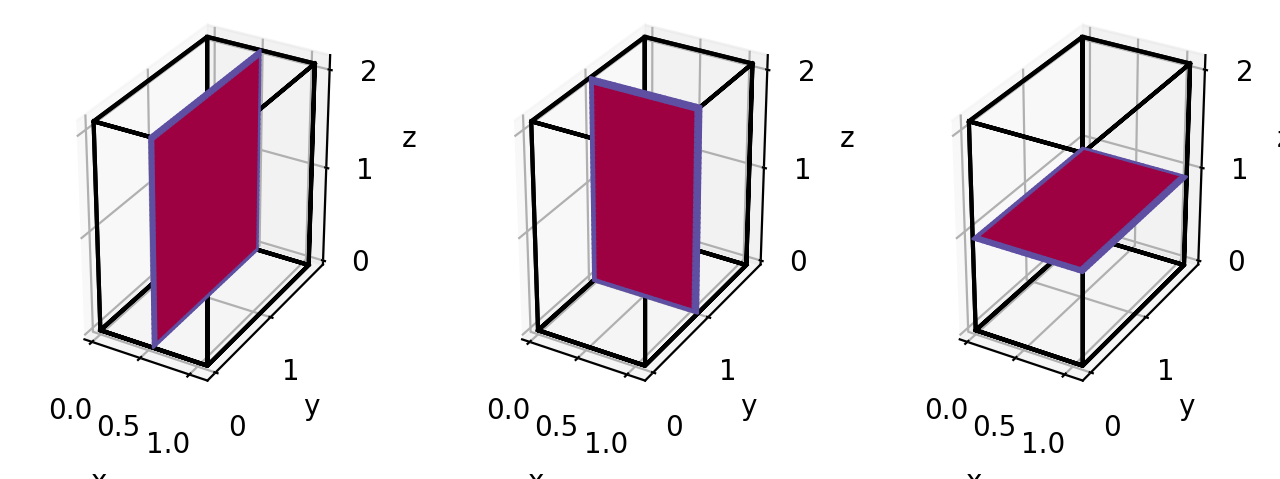

In [67]:
run_dir = os.path.join(run_dirs, 'scaling_temp0_thickness0.1_power1000')
i = 119
rho, T, vx, vy, vz, p = [np.load(os.path.join(run_dir, var_name)) for var_name in [f'{var}_{i}.npy' for var in ['rho', 'T', 'vx', 'vy', 'vz', 'p']]]

vmin = min(T.min(), T.min())
vmax = max(T.max(), T.max())
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
print(vmin, vmax)
Nx, Ny, Nz = T.shape
ds = 0.05
fig = plt.figure(figsize=(8, 8), dpi=200)
ax = fig.add_subplot(131, projection='3d')
# outline of the 6 faces of box 
ax.plot([0, 0, 0, 0, 0, 0, 0, 0], [0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [0, 0, 0, 0, 0, 0, 0, 0], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds], color='k')


x = [i*ds for i in range(Nx+1)]
y = [i*ds for i in range(Ny+1)]
z = [i*ds for i in range(Nz+1)]
x_cut = T[Nx//2, :, :] 
Y, Z = np.meshgrid(y, z) 
Y = Y.T
Z = Z.T
# [0:Ny*ds:Ny, 0:Nz*ds:Nz] # np.meshgrid(y, z)
X = ds*(Nx//2) *np.ones((len(y), len(z))) 
colormap = plt.cm.Spectral_r
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap(x_cut), shade=False, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# set aspect ratio to be the same 
# ax.set_aspect('equal')
limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
ax.set_box_aspect(np.ptp(limits, axis = 1))

ax = fig.add_subplot(132, projection='3d')
# outline of the 6 faces of box 
ax.plot([0, 0, 0, 0, 0, 0, 0, 0], [0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [0, 0, 0, 0, 0, 0, 0, 0], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds], color='k')


x = [i*ds for i in range(Nx+1)]
y = [i*ds for i in range(Ny+1)]
z = [i*ds for i in range(Nz+1)]
y_cut = T[:, Ny//2, :] 
X, Z = np.meshgrid(x, z) 
X = X.T
Z = Z.T
# [0:Ny*ds:Ny, 0:Nz*ds:Nz] # np.meshgrid(y, z)
Y = ds*(Ny//2) *np.ones((len(x), len(z))) 
colormap = plt.cm.Spectral_r
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap(y_cut), shade=False, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# set aspect ratio to be the same 
# ax.set_aspect('equal')
limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
ax.set_box_aspect(np.ptp(limits, axis = 1))

ax = fig.add_subplot(133, projection='3d')
# outline of the 6 faces of box 
ax.plot([0, 0, 0, 0, 0, 0, 0, 0], [0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [0, 0, 0, 0, 0, 0, 0, 0], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds, Ny*ds], [0, 0, Nz*ds, Nz*ds, 0, 0, 0, Nz*ds], color='k')
ax.plot([0, Nx*ds, Nx*ds, 0, 0, 0, Nx*ds, Nx*ds], [0, 0, Ny*ds, Ny*ds, 0, 0, 0, Ny*ds], [Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds, Nz*ds], color='k')


x = [i*ds for i in range(Nx+1)]
y = [i*ds for i in range(Ny+1)]
z = [i*ds for i in range(Nz+1)]
z_cut = T[:, :, Ny//2] 
X, Y = np.meshgrid(x, y) 
X = X.T
Y = Y.T
# [0:Ny*ds:Ny, 0:Nz*ds:Nz] # np.meshgrid(y, z)
Z = ds*(Ny//2) *np.ones((len(x), len(y))) 
colormap = plt.cm.Spectral_r
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap(z_cut), norm=norm, shade=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# set aspect ratio to be the same 
# ax.set_aspect('equal')
limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
ax.set_box_aspect(np.ptp(limits, axis = 1))
plt.show()



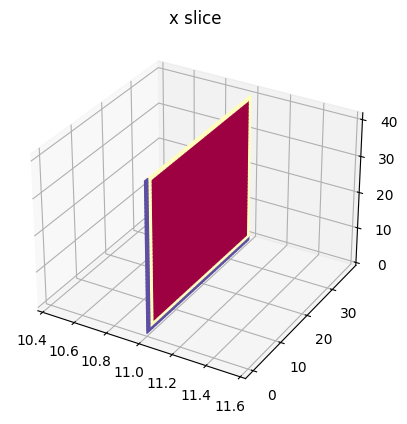

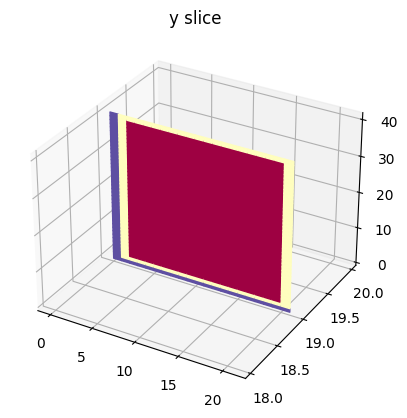

In [63]:
# Assuming T.shape gives the dimensions of the grid and T itself holds the temperature data
Nx, Ny, Nz = T.shape
ds = 0.05

def plot_3D_array_slices(array):
    min_val = array.min()
    max_val = array.max()
    n_x, n_y, n_z = array.shape
    colormap = plt.cm.Spectral_r

    x_cut = array[n_x//2,:,:]
    Y, Z = np.mgrid[0:n_y, 0:n_z]
    X = n_x//2 * np.ones((n_y, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("x slice")
    
    y_cut = array[:,n_y//2,:]
    X, Z = np.mgrid[0:n_x, 0:n_z]
    Y = n_y//2 * np.ones((n_x, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((y_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("y slice")
    """
    z_cut = array[:,:,n_z//2]
    X, Y = np.mgrid[0:n_x, 0:n_y]
    Z = n_z//2 * np.ones((n_x, n_y))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((z_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("z slice")
    """
    plt.show()
plot_3D_array_slices(T)

In [ ]:
for config_name in configs: 
    config = read_yaml_input_file(os.path.join(config_dir, config_name))
    run_dir = os.path.join(run_dirs, config_name.split('.yaml')[0])
    

In [25]:
i = 50
rho, T, vx, vy, vz, p = [np.load(os.path.join(run_dir, var_name)) for var_name in [f'{var}_{i}.npy' for var in ['rho', 'T', 'vx', 'vy', 'vz', 'p']]]

In [31]:
T.shape
print(T.mean(), T.std())

1.8992623 0.8892358


In [68]:
def plot_grid(arr): 
    print(config)
    ds = 0.05
    Nx, Ny, Nz = arr.shape
    grid = arr.T
    
    vmin = min(grid.min(), grid.min())
    vmax = max(grid.max(), grid.max())
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    fig, axs = plt.subplots(1, 4, figsize=(8, 8), dpi=200, sharey='row', sharex='row')
    # axs = axs.ravel()
    for n, Z_index in enumerate([int(i*Nz//4) for i in range(4)]): 
        cax = axs[n].imshow(grid[ Z_index+1, :,:], extent=[0, Nx*ds, Ny*ds, 0], norm=norm)
        axs[n].set_title(f'Z={Z_index*ds:.2}m')#  @ {simrealtime/(60.0*60.0):.3}h')
    # axs[0, n].axvline(ds*(Ny//7))
        # axs[1, n].hist(grid[Z_index+1, :, :].flatten(), bins=100, density=True)
        # axs[1, n].axvline(np.mean(grid[Z_index+1, :, :]), color='k', linestyle='dashed', linewidth=1)
        # axs[1, n].axvline(np.median(grid[Z_index+1, Ny//4, Nz//4]), color='r', linestyle='dashed', linewidth=1)
    fig.colorbar(cax, ax=axs.ravel().tolist(), location='right')
    plt.show()

{'Nx': 20, 'Ny': 36, 'Nz': 40, 'nGhosts_cond': 1, 'nGhosts_euler': 2, 'wall_thickness': 0.01, 'computer_power': 400, 'outside_temperature': 0, 'lamp_power': 500.0, 'lamp_dimensions': {'len_x': 8, 'len_y': 12, 'len_z': 5}, 'lamp_position': {'x': 3, 'y': 12, 'z': 30}}


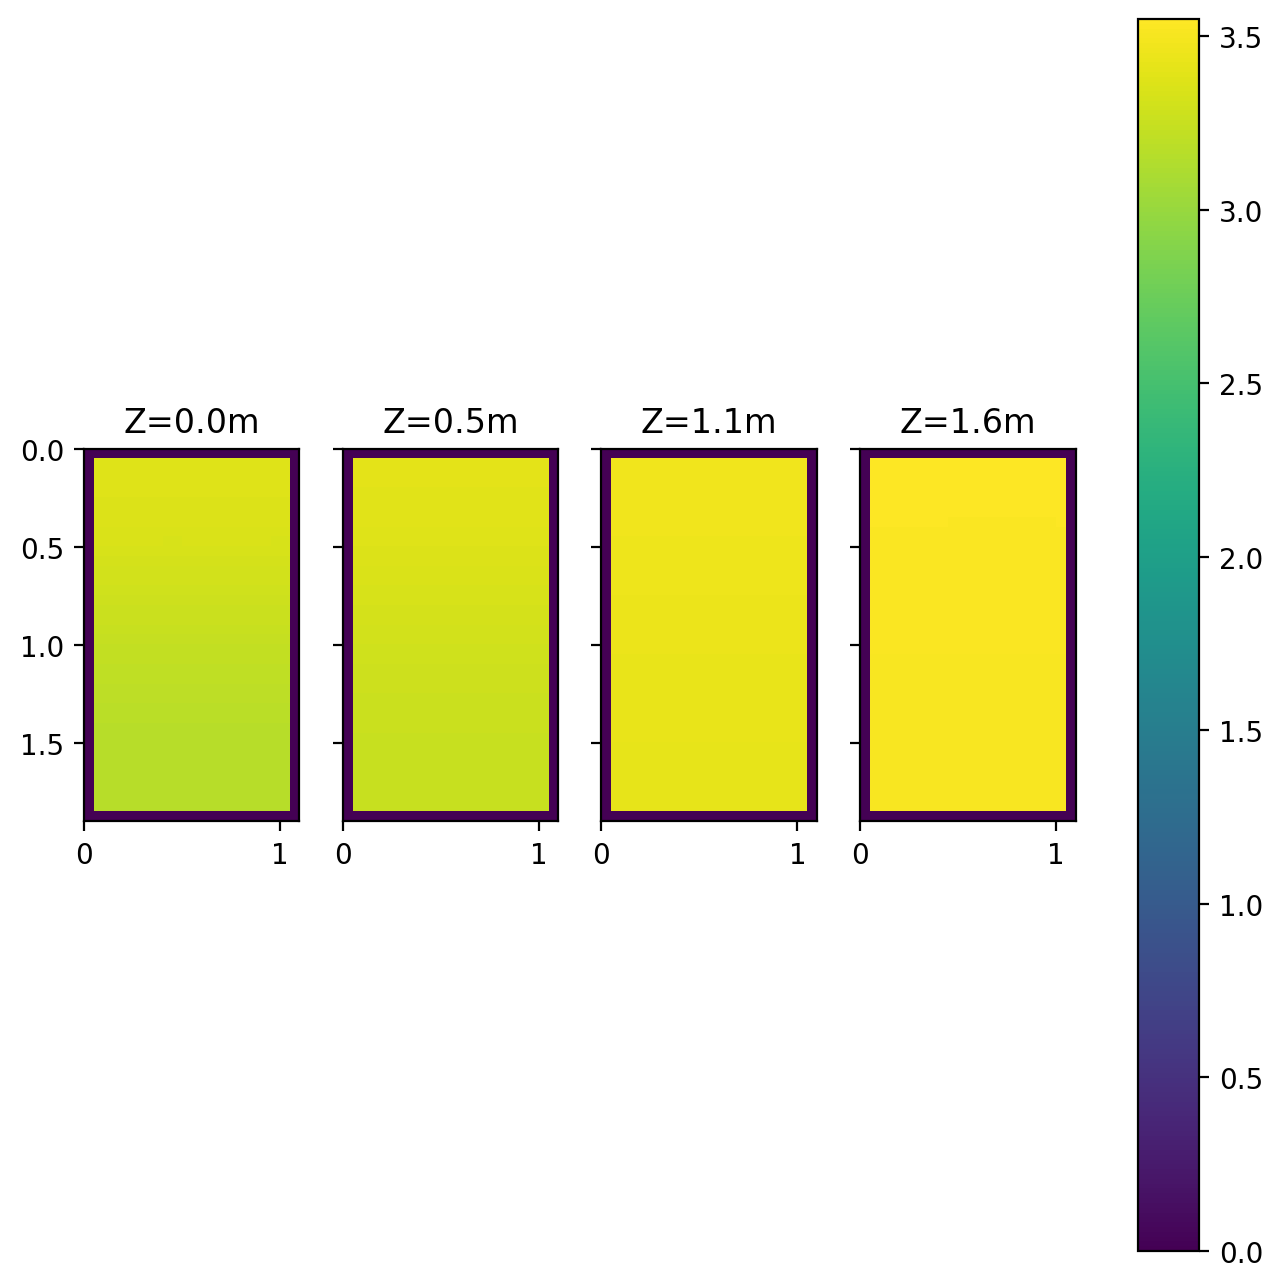

In [69]:
plot_grid(T)